# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import openweathermapy.core as owm
import pandas as pd
import numpy as np
import requests
import time
import datetime


# Import API key
from api_keys import api_key
#import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_codes = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
     
# Print the city count to confirm sufficient count
len(cities)

599

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
lat = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
city_2 = []
current_date = datetime.datetime.now().strftime("%a, %d %B %Y %H:%M")

for x in range(len(cities)):
    print("API Calls for: " + cities[x])
    response = requests.get(f"{query}{cities[x]}").json()
    try:
          lat.append(response["coord"]["lat"])
          temp.append(response["main"]["temp"])
          humidity.append(response["main"]["humidity"])
          wind_speed.append(response["wind"]["speed"])
          cloudiness.append(response["clouds"]["all"])
          city_2.append(response["name"])
    except KeyError:
          print("City not found")
          
print("Completed")
    

API Calls for: narsaq
API Calls for: barrow
API Calls for: bredasdorp
API Calls for: rocha
API Calls for: atuona
API Calls for: bairiki
City not found
API Calls for: bambous virieux
API Calls for: austin
API Calls for: jamestown
API Calls for: kodinsk
API Calls for: vaitupu
City not found
API Calls for: artyk
City not found
API Calls for: airai
API Calls for: punta arenas
API Calls for: hermanus
API Calls for: ushuaia
API Calls for: butaritari
API Calls for: upernavik
API Calls for: dikson
API Calls for: vardo
API Calls for: guajara-mirim
City not found
API Calls for: tuktoyaktuk
API Calls for: bluff
API Calls for: manado
API Calls for: kruisfontein
API Calls for: gamba
API Calls for: cape town
API Calls for: pemba
API Calls for: hambantota
API Calls for: berlevag
API Calls for: porto walter
API Calls for: ust-kuyga
API Calls for: pangnirtung
API Calls for: rikitea
API Calls for: bethel
API Calls for: longlac
City not found
API Calls for: blagoyevo
API Calls for: tambura
City not found

API Calls for: aklavik
API Calls for: bolungarvik
City not found
API Calls for: tilichiki
API Calls for: dryden
API Calls for: lompoc
API Calls for: novobiryusinskiy
API Calls for: cabedelo
API Calls for: padang
API Calls for: predivinsk
API Calls for: broome
API Calls for: wahiawa
API Calls for: belgrade
API Calls for: adrar
API Calls for: yabelo
API Calls for: kitimat
API Calls for: oxapampa
API Calls for: kamskiye polyany
API Calls for: trelleborg
API Calls for: liverpool
API Calls for: vila franca do campo
API Calls for: ugra
API Calls for: havre-saint-pierre
API Calls for: high level
API Calls for: itarema
API Calls for: dzitbalche
API Calls for: tiruchchendur
API Calls for: naica
API Calls for: pangai
API Calls for: valdemarpils
API Calls for: samusu
City not found
API Calls for: talara
API Calls for: anastacio
API Calls for: mount gambier
API Calls for: beaumont
API Calls for: isla vista
API Calls for: nizhneyansk
City not found
API Calls for: progreso
API Calls for: sovetskiy
A

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_info = {
    "City" : city_2,
    "Latitude" : lat,
    "Temperature" : temp,
    "Humidity" : humidity,
    "Wind Speed" : wind_speed,
    "Cloudiness" : cloudiness
}

city_data = pd.DataFrame(weather_info)
city_data.head()

,City,Latitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Narsaq,60.91,28.40,68,1.77,68
1,Barrow,-38.31,71.77,78,4.74,88
2,Bredasdorp,-34.53,59.00,82,3.36,56
3,Rocha,-34.48,71.86,82,11.39,92
4,Atuona,-9.80,81.94,99,15.59,48


In [6]:
city_data.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

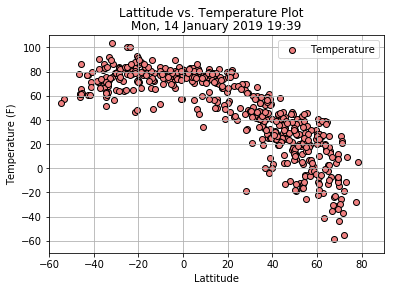

In [7]:
x = city_data["Latitude"]
y = city_data["Temperature"]
plt.suptitle(("Lattitude vs. Temperature Plot"))
plt.title(current_date)
plt.scatter(x,y,c="lightcoral", edgecolor="black")
plt.grid()
plt.legend()
plt.xlabel("Lattitude")
plt.ylabel("Temperature (F)")
plt.xlim(-60,90)
plt.ylim(-70,110)

plt.savefig("lat_vs_temp.png")

plt.show()

#### Latitude vs. Humidity Plot

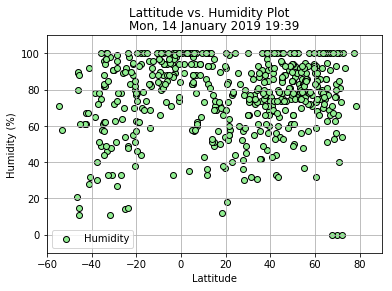

In [8]:
x = city_data["Latitude"]
y = city_data["Humidity"]
plt.suptitle(("Lattitude vs. Humidity Plot"))
plt.title(current_date)
plt.scatter(x,y,c="lightgreen", edgecolor="black")
plt.grid()
plt.legend()
plt.xlabel("Lattitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60,90)
plt.ylim(-10,110)

plt.savefig("lat_vs_humidity.png")

plt.show()

#### Latitude vs. Cloudiness Plot

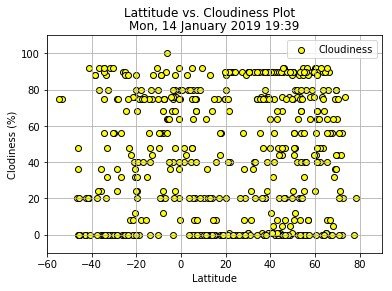

In [9]:
x = city_data["Latitude"]
y = city_data["Cloudiness"]
plt.suptitle(("Lattitude vs. Cloudiness Plot"))
plt.title(current_date)
plt.scatter(x,y,c="yellow", edgecolor="black")
plt.grid()
plt.legend()
plt.xlabel("Lattitude")
plt.ylabel("Clodiness (%)")
plt.xlim(-60,90)
plt.ylim(-10,110)

plt.savefig("lat_vs_cloudiness.png")

plt.show()

#### Latitude vs. Wind Speed Plot

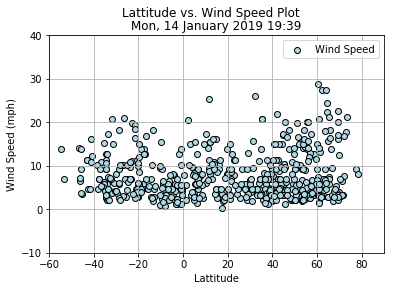

In [10]:
x = city_data["Latitude"]
y = city_data["Wind Speed"]
plt.title(current_date)
plt.suptitle("Lattitude vs. Wind Speed Plot")
plt.scatter(x,y,c="lightblue", edgecolor="black")
plt.grid()
plt.legend()
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-60,90)
plt.ylim(-10,40)

plt.savefig("lat_vs_windspeed.png")

plt.show()

### OBSERVATIONS

* Wind speeds in Northern Hemisphere are higher than Southern Hemisphere.
* Temperature plot clearly illustrates the different seasons in Northern and Southern Hemispheres.
* Higher rate of Cloudiness being reported in the Northern Hemisphere.